# Código para leer los datos de despolarización

In [1]:
#leer datos
import pandas as pd
import numpy as np
import os, re, glob
import matplotlib.pyplot as plt
import qutip
plt.style.use(['science', 'notebook', 'grid'])

In [4]:
#values[:,0] #returns the values of first column
#values[0,:] #returns the values of first row
!pip install qutip

# Caso 2: Biplacas alineadas

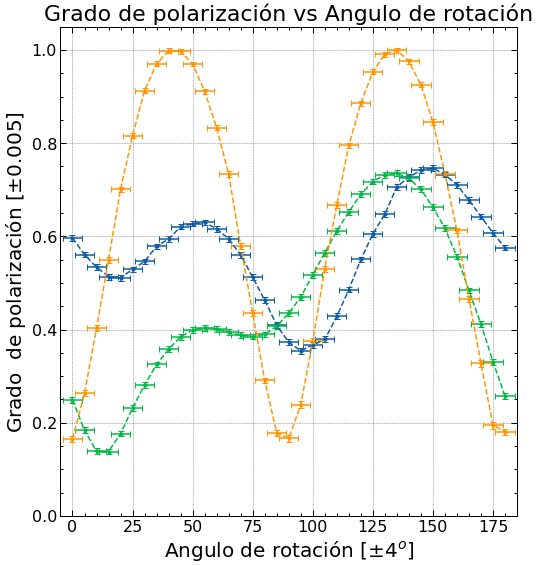

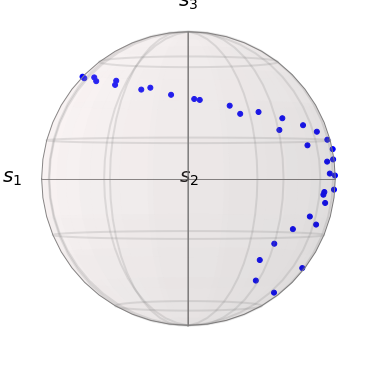

In [38]:
def main():

    def read_data(path):
        
        all_files = glob.glob(path + '*.csv') #leer todos los archivos .csv de la carpeta
        
        all_files.sort(key=lambda x:[int(c) if c.isdigit() else c for c in re.split(r'(\d+)', x)]) #ordenar como windows
        
        mean = np.array([pd.read_csv(filename, engine='python', #to read haders between quotation marks like "Header"
                      index_col=False, header = 23, #The first data column is not longer use as colum index
                                  usecols = [1,2,3,4,5,8]).mean() for filename in all_files])
        
        std = np.array([pd.read_csv(filename, engine='python', #to read haders between quotation marks like "Header"
                      index_col=False, header = 23, #The first data column is not longer use as colum index
                                  usecols = [1,2,3,4,5,8]).std() for filename in all_files])
    
        return mean, std
    
    def graphic():
        
        path1 = 'Mediciones experimentales/Caso 5/'
        path2 = 'Mediciones experimentales/Caso 9/'
        path3 = 'Mediciones experimentales/Caso 2/'
        
        data_mean1, data_std1 = read_data(path1)
        data_mean2, data_std2 = read_data(path2)
        data_mean3, data_std3 = read_data(path3)
        
        
        theta = np.arange(0,185,5)
        
        Fig = plt.figure(figsize=(18, 9))
        
        ax1 = Fig.add_subplot(121)
        
        ax1.errorbar(theta, (data_mean1[0:37,5] - (data_mean1[:,5].max()-100))/100,
                xerr = 4*np.ones(data_mean1[0:37,5].size), yerr =0.005 + data_std1[0:37,5]/100, fmt='--o', 
                    capsize=3, linewidth=1.5, markersize=3)
        
        ax1.errorbar(theta, (data_mean2[0:37,5] - (data_mean2[:,5].max()-100))/100,
                xerr = 4*np.ones(data_mean1[0:37,5].size), yerr =0.005 + data_std2[0:37,5]/100, fmt='--o', 
                    capsize=3, linewidth=1.5, markersize=3)
        
        ax1.errorbar(theta, (data_mean3[0:37,5] - (data_mean3[:,5].max()-100))/100,
                xerr = 4*np.ones(data_mean3[0:37,5].size), yerr =0.005 + data_std3[0:37,5]/100, fmt='--o', 
                    capsize=3, linewidth=1.5, markersize=3)
        
        ax1.axis([-5, 185, 0, 1.05]) # [x_min, x_max, y_min, y_max] axis limit
        ax1.set_xlabel('Angulo de rotación $[\pm 4^o]$' , fontsize=20)
        ax1.set_ylabel('Grado  de polarización $[\pm 0.005]$' , fontsize=20)

        ax1.set_title('Grado de polarización vs Angulo de rotación',fontsize=22)
        
        s1 = data_mean2[0:37,0]
        s2 = data_mean2[0:37,1]
        s3 = data_mean2[0:37,2]
    
        pts = [s1, s2, s3]    
    
        b = qutip.Bloch()
        b.xlabel=['$s_1$', '']
        b.ylabel=['$s_2$', '']
        b.zlabel=['$s_3$', '']
        b.sphere_alpha = 0.1
        b.view = [0,0]  #Azimutal y elevación
        b.size = [10,10]

        b.add_points(pts)

#b.make_sphere()

        b.render()
        
    return graphic()


if __name__ == '__main__':
    main()
    

In [156]:
##leer datos sin un for con mapeos (aun que hay investigar como sacar los promedios. etc)

path = 'biplaca 1 estado lineal/'
all_files = glob.glob(path + '*.csv')
all_files.sort(key=lambda x:[int(c) if c.isdigit() else c for c in re.split(r'(\d+)', x)])

files_map = map(lambda filename: pd.read_csv(filename, sep=',', 
                 engine='python', #to read haders between quotation marks like "Header"
                      index_col=False, header = 22, #The first data column is not longer use as colum index
                                  usecols = [1,2,3,4,5,8]).mean(), all_files) #We select which columns to read)
                                             
li = pd.concat(list(files_map),axis=0,ignore_index=True).values

li.reshape()

In [150]:
#table_0 = pd.read_csv(path +'estado entrada.csv', sep=',', 
        #     engine='python', #to read haders between quotation marks like "Header"
        #          index_col=False, header = 22, #The first data column is not longer use as colum index
        #                      usecols = [1,2,3,4,5,8]) #We select which columns to read
        
        #data_mean = table_0.mean().values #a row with the mean values of table_0 converted to an array
        #data_std = table_0.std().values #a row with the std values of table_0 converted to an array
        
        #header_0 = np.array(table_0.columns)  # get headers
        #data_0 = table_0.values #returns an array of all the numericals values of table "table_0"
    
        #data_mean = np.empty(0)
        #data_std = np.empty(0)
        
        #for filename in all_files: #range(start,end,step):
        #    table_i = pd.read_csv(filename, sep=',', 
        #         engine='python', #to read haders between quotation marks like "Header"
        #              index_col=False, header = 22, #The first data column is not longer use as colum index
        #                          usecols = [1,2,3,4,5,8]) #We select which columns to read
            
        #    data_mean = np.append([data_mean],[table_i.mean().values]) #append rows
        #    data_std = np.append([data_std],[table_i.std().values]) #append rows
            
            #header_i = np.array(table_i.columns)  # get headers
            #data_i = table_i.values #returns an array of all the numericals values of table "data"
            
        #a = data_mean.reshape(data_mean.size//6, 6)
        #b = data_std.reshape(data_std.size//6, 6)

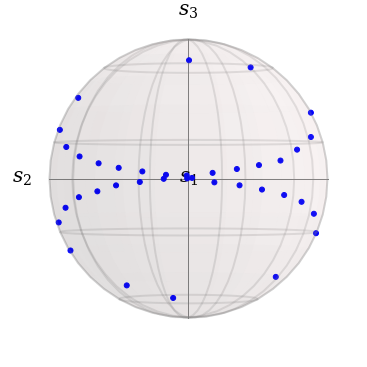

In [22]:
def read_data():
        
        path = 'Mediciones experimentales/Caso 2/'
        
        all_files = glob.glob(path + '*.csv') #leer todos los archivos .csv de la carpeta
        
        all_files.sort(key=lambda x:[int(c) if c.isdigit() else c for c in re.split(r'(\d+)', x)]) #ordenar como windows
        
        mean = np.array([pd.read_csv(filename, engine='python', #to read haders between quotation marks like "Header"
                      index_col=False, header = 22, #The first data column is not longer use as colum index
                                  usecols = [1,2,3,4,5,8]).mean() for filename in all_files])
        
        std = np.array([pd.read_csv(filename, engine='python', #to read haders between quotation marks like "Header"
                      index_col=False, header = 22, #The first data column is not longer use as colum index
                                  usecols = [1,2,3,4,5,8]).std() for filename in all_files])
    
        return mean, std

mean, std = read_data()
    
#def angle2stokes(azimut, elip):
#    s1 = np.cos(2*azimut)*np.cos(2*elip)
#    s2 = np.sin(2*azimut)*np.cos(2*elip)
#    s3 = np.sin(2*elip)
#    return [s1,s2,s3]
   
#s1, s2, s3 = angle2stokes(mean[:,4], mean[:,5])

s1 = mean[:,0]
s2 = mean[:,1]
s3 = mean[:,2]
    
pts = [s1, s2, s3]    
    
b = qutip.Bloch()
b.xlabel=['$s_1$', '']
b.ylabel=['$s_2$', '']
b.zlabel=['$s_3$', '']
b.sphere_alpha = 0.1
b.view = [90,0]  #Azimutal y elevación
b.size = [10,10]

b.add_points(pts)

#b.make_sphere()

b.render()